In [1]:
import helpers as hlp
import iris
import matplotlib.pyplot as plt
import iris.plot as iplt
import iris.quickplot as qplt
import numpy as np

In [2]:
exp_id = "OCEF"
setup = "PAPA"
oce_t_file = f"{setup}/{exp_id}/{exp_id}*_T.nc"
oce_u_file = f"{setup}/{exp_id}/{exp_id}*_U.nc"
oce_v_file = f"{setup}/{exp_id}/{exp_id}*_V.nc"
oce_W_file = f"{setup}/{exp_id}/{exp_id}*_W.nc"
ice_file = f"{setup}/{exp_id}/{exp_id}*_icemod.nc"
atm_prog_file = f"{setup}/{exp_id}/progvar.nc"
atm_diag_file = f"{setup}/{exp_id}/diagvar.nc"
atm_diag2_file = f"{setup}/{exp_id}/diagvar2.nc"
oasis_a2o_file = f"{setup}/{exp_id}/rmp_ASCM_to_OC1D.nc"
oasis_o2a_file = f"{setup}/{exp_id}/rmp_OC1D_to_ASCM.nc"

In [3]:
oasis_a2o = hlp.load_cubes(oasis_a2o_file)
oasis_o2a = hlp.load_cubes(oasis_o2a_file)

In [4]:
oasis_o2a[2].data

masked_array(data=[1],
             mask=False,
       fill_value=999999,
            dtype=int32)

In [5]:
nemo_t = hlp.load_cubes(oce_t_file)
atm_prog = hlp.load_cubes(atm_prog_file)
atm_diag = hlp.load_cubes(atm_diag_file)
atm_diag2 = hlp.load_cubes(atm_diag2_file)

ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_are_convertible(): NULL unit argument
ut_divide(): NULL argument
ut_are_convertible(): NULL unit argument
ut_scale(): NULL factor argument
ut_are_convertible(): NULL unit argument
ut_divide(): NULL argument
ut_are_convertible(): NULL unit argument


ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_are_convertible(): NULL unit argument
ut_divide(): NULL argument
ut_are_convertible(): NULL unit argument
ut_scale(): NULL factor argument
ut_are_convertible(): NULL unit argument
ut_divide(): NULL argument
ut_are_convertible(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): 

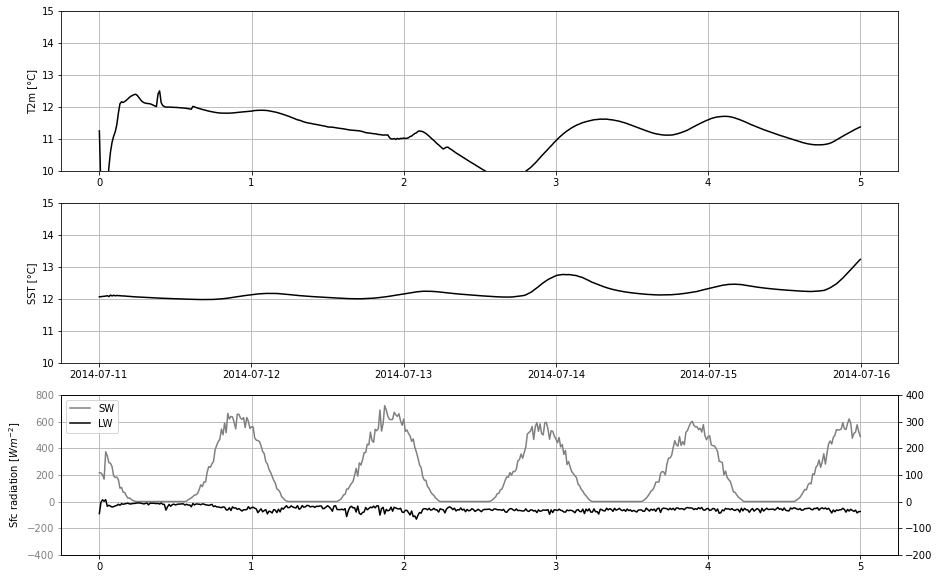

In [6]:
fig, axs = plt.subplots(3, 1)
fig.set_size_inches(15,10)

ax_2t = axs[0]
varname = "Temperature 2m"
atm_2t = hlp.load_cube(atm_diag_file, varname)
atm_2t.convert_units('degC')
time_coord = atm_2t.coord('time')
time_coord.convert_units('d')
qplt.plot(atm_2t, axes=ax_2t, color="k")
ax_2t.set_ybound(10, 15)
ax_2t.set_ylabel("T2m [°C]")
ax_2t.set_yticks(list(range(10, 16)))
ax_2t.set_xlabel("")
ax_2t.grid()
ax_2t.set_title("")

ax_sst = axs[1]
varname = "Sea Surface temperature"
oce_sst = hlp.load_cube(oce_t_file, varname)
qplt.plot(oce_sst[:,1,1], axes=ax_sst, color="k")
ax_sst.set_ybound(10, 15)
ax_sst.set_ylabel("SST [°C]")
ax_sst.set_yticks(list(range(10, 16)))
ax_sst.set_xlabel("")
ax_sst.grid()
ax_sst.set_title("")

# Plot surface SW and LW radiation into the same axis
Nticks = 7

# SW Radiation
lcolor = "grey"
ax_sw = axs[2]
varname = "Surface SW Radiation"
atm_sfc_swr = hlp.load_cube(atm_diag_file, varname)
time_coord = atm_sfc_swr.coord('time')
time_coord.convert_units('d')
qplt.plot(atm_sfc_swr, axes=ax_sw, color=lcolor, label="SW")
ax_sw.set_title("")
ax_sw.set_xlabel("")
ax_sw.set_ylabel(r"Sfc radiation [$W m^{-2}$]")
ax_sw.set_ybound(-400, 800)
lines_sw, labels_sw = ax_sw.get_legend_handles_labels()
ax_sw.set_yticks(np.linspace(ax_sw.get_ybound()[0], ax_sw.get_ybound()[1], Nticks))
ax_sw.tick_params(axis="y", colors=lcolor)

# LW Radiation
lcolor = "k"
ax_lw = ax_sw.twinx()
varname = "Surface LW Radiation"
atm_sfc_lwr = hlp.load_cube(atm_diag_file, varname)
time_coord = atm_sfc_lwr.coord('time')
time_coord.convert_units('d')
qplt.plot(atm_sfc_lwr, axes=ax_lw, color=lcolor, label="LW")
ax_lw.set_title("")
ax_lw.set_xlabel("")
ax_lw.set_ylabel("")
ax_lw.set_ybound(-200, 400)
lines_lw, labels_lw = ax_lw.get_legend_handles_labels()
ax_lw.set_yticks(np.linspace(ax_lw.get_ybound()[0], ax_lw.get_ybound()[1], Nticks))

# align ticks and turn on grid
ax_sw.grid()
ax_sw.legend(lines_sw + lines_lw, labels_sw + labels_lw)

fig.savefig(f"plots/figure7_reproduction_{setup}_{exp_id}.pdf", bbox_inches="tight")

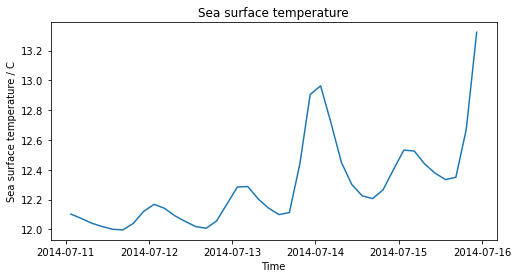

In [7]:
varname = "Sea Surface temperature"
sst = hlp.load_cube(oce_t_file, varname)
#time_coord = sst.coord('time')
#time_coord.convert_units('days since 2014-07-14 00:00:00')

fig, ax = plt.subplots()
fig.set_size_inches(8,4)
qplt.plot(sst[:,1,1], axes=ax)
fig.savefig(f'plots/{exp_id}_nemo_sst_48.png', dpi=300, bbox_inches='tight')

ut_scale(): NULL factor argument
ut_are_convertible(): NULL unit argument
ut_divide(): NULL argument
ut_are_convertible(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_are_convertible(): NULL unit argument
ut_divide(): NULL argument
ut_are_convertible(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument


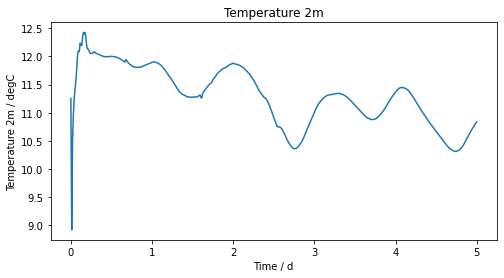

In [8]:
atm_temp = hlp.load_cube(atm_diag_file, "Temperature 2m")

atm_temp.convert_units('degC')
time_coord = atm_temp.coord('time')
time_coord.convert_units('d')

fig, ax = plt.subplots()
fig.set_size_inches(8,4)
qplt.plot(atm_temp, axes=ax)
fig.savefig(f'plots/{exp_id}_oifs_2t_48.png', dpi=300, bbox_inches='tight')

In [9]:
atm_diag = hlp.load_cubes(atm_diag_file)
atm_diag

ut_scale(): NULL factor argument
ut_are_convertible(): NULL unit argument
ut_divide(): NULL argument
ut_are_convertible(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_are_convertible(): NULL unit argument
ut_divide(): NULL argument
ut_are_convertible(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument


Wind Gust At 10M (m/s),time
Shape,481
Dimension coordinates,
time,x
Attributes,dataID SCM_OUTPUTmodelID 36r1simulationID trref_windstart_day 20140701start_hour 0
title SCM,36r1 Sim: trref_wind
Index Of Convective Cloud Top (1),time
Shape,481
Dimension coordinates,
time,x
Attributes,dataID SCM_OUTPUTmodelID 36r1simulationID trref_windstart_day 20140701start_hour 0


ut_scale(): NULL factor argument
ut_are_convertible(): NULL unit argument
ut_divide(): NULL argument
ut_are_convertible(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_are_convertible(): NULL unit argument
ut_divide(): NULL argument
ut_are_convertible(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_are_convertible(): NULL unit argument
ut_divide(): NULL argument
ut_are_convertible(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_are_convertible(): NULL unit argument
ut_divide(): NULL argument
ut_are_convertible(): NUL

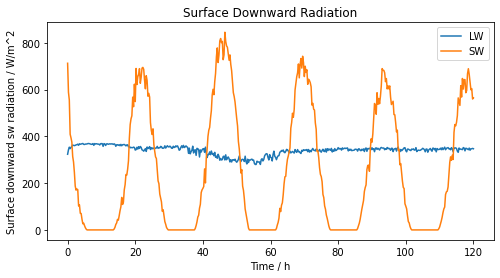

In [10]:
sdlw = hlp.load_cube(atm_diag_file, "Surface Downward LW Radiation")
sdsw = hlp.load_cube(atm_diag_file, "Surface Downward SW Radiation")

# atm_temp.convert_units('degC')
time_coord = sdlw.coord('time')
time_coord.convert_units('h')
time_coord = sdsw.coord('time')
time_coord.convert_units('h')
fig, ax = plt.subplots()
fig.set_size_inches(8,4)
qplt.plot(sdlw, axes=ax, label="LW")
qplt.plot(sdsw, axes=ax, label="SW")
ax.legend()
ax.set_title("Surface Downward Radiation")
fig.savefig(f'plots/{exp_id}_oifs_sdr.png', dpi=300, bbox_inches='tight')

ut_scale(): NULL factor argument
ut_are_convertible(): NULL unit argument
ut_divide(): NULL argument
ut_are_convertible(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_are_convertible(): NULL unit argument
ut_divide(): NULL argument
ut_are_convertible(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument


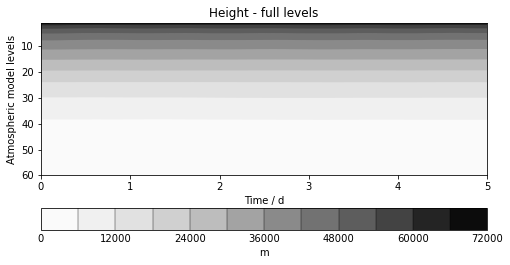

In [11]:
p = hlp.load_cube(atm_diag_file, "Height - full levels")
fig, ax = plt.subplots()
fig.set_size_inches(8,4)
# p.convert_units("hPa")
time_coord = p.coord("time")
time_coord.convert_units("d")
qplt.contourf(p, axes=ax, coords=['time', 'Atmospheric Model Levels'], cmap='Greys', levels=10)
ax.invert_yaxis()
fig.savefig(f'plots/{exp_id}_oifs_h.jpg', dpi=300, bbox_inches='tight')

ut_scale(): NULL factor argument
ut_are_convertible(): NULL unit argument
ut_divide(): NULL argument
ut_are_convertible(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_are_convertible(): NULL unit argument
ut_divide(): NULL argument
ut_are_convertible(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument
ut_scale(): NULL factor argument
ut_raise(): NULL unit argument


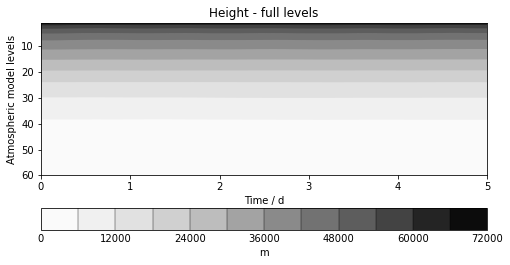

In [12]:
p = hlp.load_cube(atm_diag_file, "Height - full levels")
fig, ax = plt.subplots()
fig.set_size_inches(8,4)
# p.convert_units("hPa")
time_coord = p.coord("time")
time_coord.convert_units("d")
qplt.contourf(p, axes=ax, coords=['time', 'Atmospheric Model Levels'], cmap='Greys', levels=10)
ax.invert_yaxis()
fig.savefig(f'plots/{exp_id}_oifs_h.jpg', dpi=300, bbox_inches='tight')